In [1]:
import os
import matplotlib.pyplot as plt
import numpy
#import numpy as np
import matplotlib
import time

cost_error_list = []
average_value = 0.0
standard_deviation = 0.0

LOOP_CNT = 1000
MAX_ERROR = 1e-5

def GetHouserData(file_path_name):
    #获取数据，只获取房屋尺寸和价格，没有获取房间数
    house_size = []
    house_value = []
    data_lines = []
    data_cut = []
    if os.path.exists(file_path_name):
        file_fd = open(file_path_name, 'r')
        data_lines = file_fd.readlines()
        file_fd.close()
        for x in data_lines:
            if ',' in x:
                data_cut = x.split(',')
                house_size.append(int(data_cut[0]))
                house_value.append(int(data_cut[2]))
        return(1, house_size, house_value)
    return(0, 'file not exist')

In [2]:
def DrawScatter(x_data, y_data):
    #画点
    %matplotlib inline
    plt.style.use('ggplot')
    plt.scatter(x_data, y_data, color='green')
    plt.xlabel('house size')
    plt.ylabel('house value $')

In [3]:
def DrawPlot(x_data, y_data, color_str = 'r'):
    #划线
    plt.plot(x_data, y_data, color = color_str)

In [4]:
def AddOnestoMatric(list_to_mat):
    #添加1到矩阵中
    #[[1, 1, 1] 添加的1数据
    #[2, 3, 4]]
    matric_add_ones = []
    matric_ones = numpy.array(numpy.ones((1, len(list_to_mat))))
    matric_add_ones = numpy.vstack((matric_ones, numpy.array(list_to_mat)))
    return matric_add_ones

In [5]:
def DrawCostValue(value, max_x_limit):
    #画误差值的变化
    %matplotlib inline
    plt.style.use('ggplot')
    plt.xlim([0, max_x_limit])
    plt.plot(value, color='blue')
    plt.title('cost value')
    plt.xlabel('loop count')
    plt.ylabel('cost value')

In [6]:
def CostValue(matric_x, theta, matric_y):
    cost_value = []
    hypothesis_value = numpy.array(theta).dot(matric_x)
    cost_value = (hypothesis_value - numpy.array(matric_y)).sum() ** 2 / (2 * len(matric_y))
    return cost_value

In [7]:
def LearnEnd(old_value, new_value, max_error, cnt, max_cnt):
    if (cnt >= max_cnt):
        return 1
    else:
        if(max_error > abs(old_value - new_value)):
            return 1
    return 0
        

In [8]:
def StochasticGradientDescent(matric_x, theta, matric_y, lr):
    #随机梯度下降,使用当前数据，该方法学习效果不好，出现cost值变大，需要调整learnning rate，改小lr
    global cost_error_list
    cost_error_list = []
    theta_x_tmp = [0, 0]
    theta_tmp = []
    loop_cnt = 0
    cost_value_tmp_old = 0
    cost_value_tmp = 0
    cost_y_value = 0
#    lr_tmp = lr
    lr_tmp = lr * 0.02
    
    for i in range(len(theta)):
        theta_tmp.append(theta[i])
    while(True):
        for i in range(len(matric_y)):
            cost_y_value = (matric_x[0][i] * theta_tmp[0]) + (matric_x[1][i] * theta_tmp[1]) -  matric_y[i]
            theta_x_tmp[0] = cost_y_value * matric_x[0][i]
            theta_x_tmp[1] = cost_y_value * matric_x[1][i]
        
            theta_tmp[0] = theta_tmp[0] - lr_tmp * theta_x_tmp[0]
            theta_tmp[1] = theta_tmp[1] - lr_tmp * theta_x_tmp[1]
            
            theta_x_tmp[0] = 0
            theta_x_tmp[1] = 0
        
        cost_value_tmp = CostValue(matric_x, theta_tmp, matric_y)
        cost_error_list.append(cost_value_tmp)
        #print('(StochasticGradientDescent)cnt :{0} cost error :{1}, theta 0 :{2}, theta 1 :{3}'.format(loop_cnt, cost_value_tmp, theta_tmp[0], theta_tmp[1]))
        
        if(LearnEnd(cost_value_tmp_old, cost_value_tmp, MAX_ERROR, loop_cnt, LOOP_CNT)):
            break
            
        cost_value_tmp_old = cost_value_tmp
        loop_cnt += 1
        
    return theta_tmp

In [9]:
def GradientDescent(matric_x, theta, matric_y, lr):
    #批量梯度下降，不使用矩阵运算
    global cost_error_list
    cost_error_list = []
    y_sum_tmp = [0, 0]
    theta_tmp = []
    loop_cnt = 0
    cost_value_tmp_old = 0
    cost_value_tmp = 0
    cost_y_value = 0
    
    for i in range(len(theta)):
        theta_tmp.append(theta[i])
        y_sum_tmp.append(0)
    while(True):
        for i in range(len(matric_y)):
            cost_y_value = (matric_x[0][i] * theta_tmp[0]) + (matric_x[1][i] * theta_tmp[1]) -  matric_y[i]
            y_sum_tmp[0] += cost_y_value * matric_x[0][i]
            y_sum_tmp[1] += cost_y_value * matric_x[1][i]
        
        y_sum_tmp[0] = y_sum_tmp[0] / len(matric_y)
        y_sum_tmp[1] = y_sum_tmp[1] / len(matric_y)
        
        theta_tmp[0] = theta_tmp[0] - lr * y_sum_tmp[0]
        theta_tmp[1] = theta_tmp[1] - lr * y_sum_tmp[1]
        
        cost_value_tmp = CostValue(matric_x, theta_tmp, matric_y)
        cost_error_list.append(cost_value_tmp)
        #print('(GradientDescent) cnt :{0} cost error :{1}, theta 0 :{2}, theta 1 :{3}'.format(loop_cnt, cost_value_tmp, theta_tmp[0], theta_tmp[1]))
        
        if(LearnEnd(cost_value_tmp_old, cost_value_tmp, MAX_ERROR, loop_cnt, LOOP_CNT)):
            break
            
        cost_value_tmp_old = cost_value_tmp
        y_sum_tmp[0] = 0
        y_sum_tmp[1] = 0
        loop_cnt += 1
        
    return theta_tmp

In [10]:
def BatchGradientDescent(matric_x, theta, matric_y, lr):
    #批量梯度下降，使用矩阵运算
    global cost_error_list
    cost_error_list = []
    theta_tmp = []
    loop_cnt = 0
    cost_value_tmp_old = 0
    cost_value_tmp = 0
    cost_y_value = []
    
    for i in range(len(theta)):
        theta_tmp.append(theta[i])
    while(True):
        cost_y_value = numpy.array(theta_tmp).dot(matric_x) - matric_y
        theta_tmp = theta_tmp - lr * (matric_x.dot(cost_y_value)) / len(matric_y)
        cost_value_tmp = CostValue(matric_x, theta_tmp, matric_y)
        cost_error_list.append(cost_value_tmp)
        #print('(BatchGradientDescent)cnt :{0} cost error :{1}, theta 0 :{2}, theta 1 :{3}'.format(loop_cnt, cost_value_tmp, theta_tmp[0], theta_tmp[1]))
        
        if(LearnEnd(cost_value_tmp_old, cost_value_tmp, MAX_ERROR, loop_cnt, LOOP_CNT)):
            break
            
        cost_value_tmp_old = cost_value_tmp
        loop_cnt += 1
        
    return theta_tmp

In [11]:
def NormalEquation(matric_x, matric_y):
    #正规方程  ((X.T*X)^-1*X.T)*Y    X=([[1, 456, 456],[1, 268, 687], ...]) Y = ([57], [64], [81], [35], ...)
    global cost_error_list
    cost_error_list = []
    theta_tmp = []
    cost_value_tmp = 0
    #X.T*X
    #print('X', matric_x)
    XTX = matric_x.dot(matric_x.T)
    #print('XTX', XTX)
    #print('X^-1', numpy.linalg.inv(XTX))
    #print('X^-1 * X.T', numpy.dot(numpy.linalg.inv(XTX), numpy.array(matric_x)))
    theta_tmp = numpy.dot((numpy.linalg.inv(XTX).dot(numpy.array(matric_x))), (numpy.array(matric_y)).T)
    cost_value_tmp = CostValue(matric_x, theta_tmp, matric_y)
    cost_error_list.append(cost_value_tmp)
    #print('(NormalEquation)cost error :{0}, theta 0 :{1}, theta 1 :{2}'.format(cost_value_tmp, theta_tmp[0], theta_tmp[1]))
    
    return theta_tmp

In [12]:
def ScoreStandardization(list):
    #特征
    global average_value
    global standard_deviation
    average_value = 0.0
    standard_deviation = 0.0
    standatdization_list = []
    
    list_array = numpy.array(list)
    list_sum = list_array.sum()
    average_value = list_sum / len(list)
    variance_value = ((list_array - average_value) ** 2).sum() / len(list)
    standard_deviation = variance_value ** 0.5
    
    standatdization_list = (list_array - average_value) / standard_deviation
    
    return standatdization_list

house size  [2104, 1600, 2400, 1416, 3000, 1985, 1534, 1427, 1380, 1494, 1940, 2000, 1890, 4478, 1268, 2300, 1320, 1236, 2609, 3031, 1767, 1888, 1604, 1962, 3890, 1100, 1458, 2526, 2200, 2637, 1839, 1000, 2040, 3137, 1811, 1437, 1239, 2132, 4215, 2162, 1664, 2238, 2567, 1200, 852, 1852, 1203]
house value  [399900, 329900, 369000, 232000, 539900, 299900, 314900, 198999, 212000, 242500, 239999, 347000, 329999, 699900, 259900, 449900, 299900, 199900, 499998, 599000, 252900, 255000, 242900, 259900, 573900, 249900, 464500, 469000, 475000, 299900, 349900, 169900, 314900, 579900, 285900, 249900, 229900, 345000, 549000, 287000, 368500, 329900, 314000, 299000, 179900, 299900, 239500]
learn end(GradientDescent):
theta 0 :1.02591391947576, theta 1 :165.38277460002107 ,cost value: 2135851694.9178917
learn end(BatchGradientDescent):
theta 0 :1.02591391947576, theta 1 :165.38277460002107 ,cost value: 2135851694.9178917
learn end(StochasticGradientDescent):
theta 0 :0.9765626541119033, theta 1 :164.5

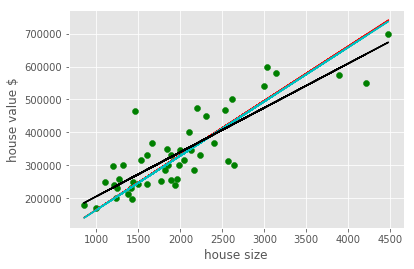

In [13]:
if __name__ == '__main__':
    ret = []
    theta = [0, 0]
    learnning_rate = 0.0000001
    matri_value = []
    data_file_name = '/home/local/SPREADTRUM/lc.fan/flc/code/jupyter_object/ex1data2.txt'
    ret = GetHouserData(data_file_name)
    if ret[0] == True:
        print('house size ', ret[1])
        print('house value ', ret[2])
        DrawScatter(ret[1], ret[2])
        matric_value = AddOnestoMatric(ret[1])
        
        theta = GradientDescent(matric_value, theta, ret[2], learnning_rate)
        print('learn end(GradientDescent):\ntheta 0 :{0}, theta 1 :{1} ,cost value: {2}'.format(theta[0], theta[1], cost_error_list[-1]))
        line_ydata = [theta[0] + i * theta[1] for i in ret[1]]
        DrawPlot(ret[1], line_ydata, 'r')
        
        theta = [0, 0]
        theta = BatchGradientDescent(matric_value, theta, ret[2], learnning_rate)
        print('learn end(BatchGradientDescent):\ntheta 0 :{0}, theta 1 :{1} ,cost value: {2}'.format(theta[0], theta[1], cost_error_list[-1]))
        
        theta = [0, 0]
        theta = StochasticGradientDescent(matric_value, theta, ret[2], learnning_rate)
        print('learn end(StochasticGradientDescent):\ntheta 0 :{0}, theta 1 :{1} ,cost value: {2}'.format(theta[0], theta[1], cost_error_list[-1]))
        line_ydata = [theta[0] + i * theta[1] for i in ret[1]]
        DrawPlot(ret[1], line_ydata, 'c')
        
        theta = [0, 0]
        theta = NormalEquation(matric_value, ret[2])
        print('learn end(NormalEquation):\ntheta 0 :{0}, theta 1 :{1} ,cost value: {2}'.format(theta[0], theta[1], cost_error_list[-1]))
        line_ydata = [theta[0] + i * theta[1] for i in ret[1]]
        DrawPlot(ret[1], line_ydata, 'k')
        
        #特征值归一化
        list_x = ScoreStandardization(ret[1])
        matric_value_standatdization = AddOnestoMatric(list_x)
        
        #使用归一化后的数据进行训练，验证时也需要对特征值归一化
        theta = [0, 0]
        theta = NormalEquation(matric_value_standatdization, ret[2])
        print('S:learn end(NormalEquation):\ntheta 0 :{0}, theta 1 :{1} ,cost value: {2}'.format(theta[0], theta[1], cost_error_list[-1]))
        
        theta = [0, 0]
        theta = GradientDescent(matric_value_standatdization, theta, ret[2], learnning_rate * 100000)
        print('S:learn end(GradientDescent):\ntheta 0 :{0}, theta 1 :{1} ,cost value: {2}'.format(theta[0], theta[1], cost_error_list[-1]))
        
        theta = [0, 0]
        theta = BatchGradientDescent(matric_value_standatdization, theta, ret[2], learnning_rate * 100000)
        print('S:learn end(BatchGradientDescent):\ntheta 0 :{0}, theta 1 :{1} ,cost value: {2}'.format(theta[0], theta[1], cost_error_list[-1]))
        
        theta = [0, 0]
        theta = StochasticGradientDescent(matric_value_standatdization, theta, ret[2], 0.01)
        print('S:learn end(StochasticGradientDescent):\ntheta 0 :{0}, theta 1 :{1} ,cost value: {2}'.format(theta[0], theta[1], cost_error_list[-1]))
        

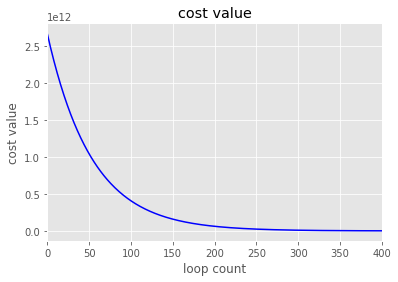

In [14]:
DrawCostValue(cost_error_list, 400)

In [15]:
print('average_value :%f, standard_deviation: %f' % (average_value, standard_deviation))

average_value :2000.680851, standard_deviation: 786.202619


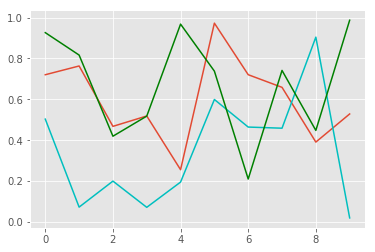

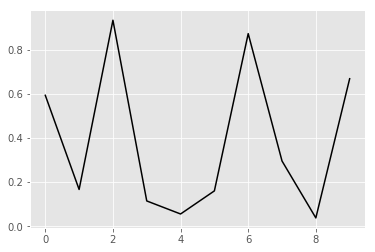

In [16]:
plt.plot(numpy.random.rand(10))
plt.plot(numpy.random.rand(10), 'c')
plt.plot(numpy.random.rand(10), 'g')
#使用show（）可以把以后绘制的图形绘制到第二张图像上
plt.show()
plt.plot(numpy.random.rand(10), 'k')